In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("products.csv")

In [3]:
df.head()

,product_id,brand,title,price,category,rating,image_url,product_url
0,B08YRWN3WB,JANSPORT,Big Student Large laptop backpack Black EK0A5B...,189.00,New season,4.7,https://m.media-amazon.com/images/I/51y2EF0OmO...,https://www.amazon.ae/dp/B08YRWN3WB
1,B08YRXFZZM,JANSPORT,Superbreak Day Pack,119.00,New season,4.6,https://m.media-amazon.com/images/I/51yvvQUs3S...,https://www.amazon.ae/dp/B08YRXFZZM
2,B09Q2PQ7ZB,BAODINI,Mini Travel Umbrella With Case Small Compact U...,17.79,New season,4.2,https://m.media-amazon.com/images/I/71WbrZPbnG...,https://www.amazon.ae/dp/B09Q2PQ7ZB
3,B001BEAWXY,Calvin Klein,Men's Cotton Classics 3-Pack Boxer Brief,119.00,New season,4.2,https://m.media-amazon.com/images/I/716vzeqa7Z...,https://www.amazon.ae/dp/B001BEAWXY
4,B09FM5PMN3,JANSPORT,Unisex Kids Bag Backpack,179.00,New season,4.4,https://m.media-amazon.com/images/I/51XASBuqjr...,https://www.amazon.ae/dp/B09FM5PMN3


In [4]:
df.shape

(13156, 8)

In [5]:
df.isnull().sum()

product_id       0
brand            1
title            1
price          193
category         0
rating         883
image_url        0
product_url      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13156 entries, 0 to 13155
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   13156 non-null  object 
 1   brand        13155 non-null  object 
 2   title        13155 non-null  object 
 3   price        12963 non-null  float64
 4   category     13156 non-null  object 
 5   rating       12273 non-null  float64
 6   image_url    13156 non-null  object 
 7   product_url  13156 non-null  object 
dtypes: float64(2), object(6)
memory usage: 822.4+ KB


In [7]:
df.describe()

,price,rating
count,12963.000000,12273.000000
mean,160.915024,4.235191
std,312.435627,0.533392
min,0.990000,1.000000
25%,45.000000,4.000000
50%,93.000000,4.400000
75%,188.000000,4.600000
max,26000.000000,5.000000


In [8]:
corr_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
           price    rating
price   1.000000  0.153325
rating  0.153325  1.000000


<Axes: >

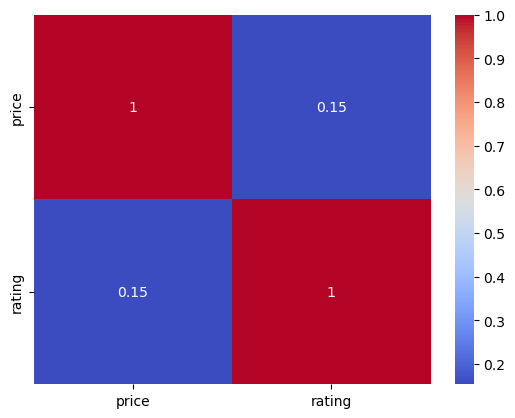

In [9]:
import seaborn as sns
sns.heatmap(corr_matrix, annot = True, cbar = True, cmap = 'coolwarm')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15540\1266987464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])


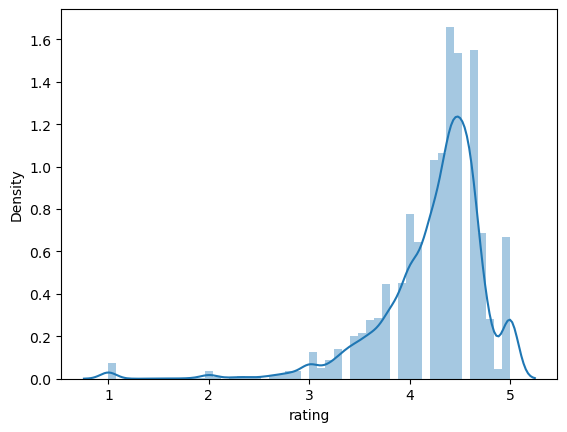

In [14]:
import matplotlib.pyplot as plt
sns.distplot(df['rating'])
plt.show()

In [26]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['target'] = (df['rating'] >= 4).astype(int)

In [27]:
X = df[['price']].fillna(0)   # ensure 2D + no NaN
y = df['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
X_train

,price
5252,29.99
5022,154.00
12009,365.18
7418,87.00
8372,186.86
...,...
8342,86.87
6658,1044.85
9759,27.98
812,249.00


In [30]:
y_train

5252     0
5022     0
12009    1
7418     1
8372     1
        ..
8342     1
6658     0
9759     0
812      1
1664     1
Name: target, Length: 10524, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)  

LogisticRegression(max_iter=1000)

In [32]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7420212765957447
